In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
data = load_iris()

In [3]:
X = data["data"]
y = data["target"]

In [4]:
X.shape

(150, 4)

In [5]:
y.shape

(150,)

In [6]:
df = pd.DataFrame(X, columns=data["feature_names"])

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
df["label"] = y

In [9]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

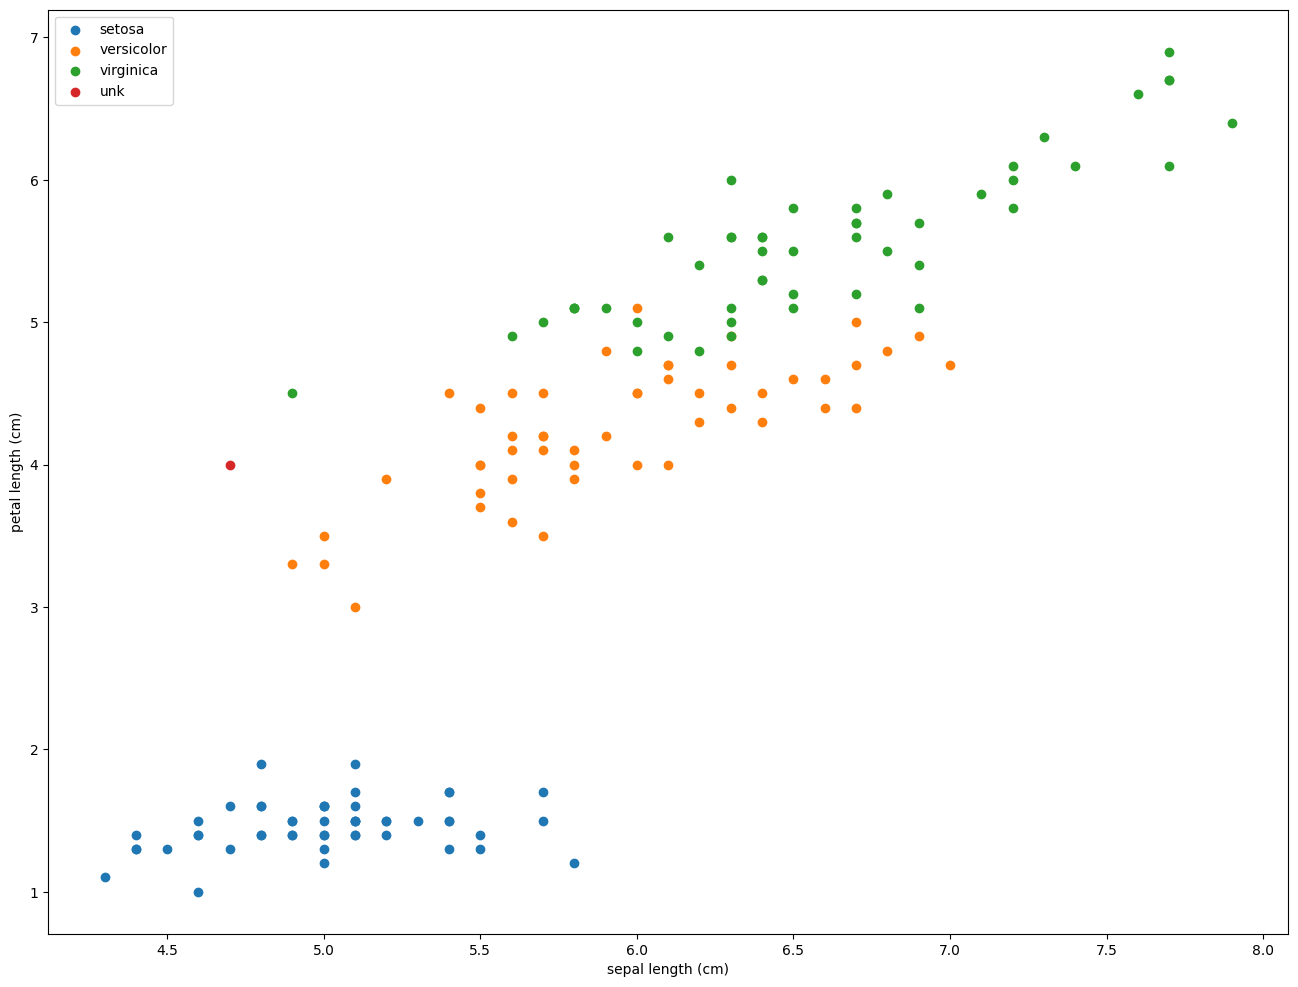

In [10]:
plt.figure(figsize=(16, 12))

for i in range(3):
    plt.scatter(
        df.loc[df["label"] == i]["sepal length (cm)"], 
        df.loc[df["label"] == i]["petal length (cm)"],
        label=data["target_names"][i])
plt.scatter([4.7], [4], label="unk")
plt.xlabel("sepal length (cm)")
plt.ylabel("petal length (cm)")
plt.legend()

In [11]:
class KNNWin:
    
    def __init__(self, k):
        self.k=k+1
        self.X = None
        self.y = None
        self.n_classes = None
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.n_classes = np.unique(y).size
        
    def kernel(self, r):
        return 70/81*(1-abs(r)**3)**3
    
    def predict_proba(self, X):
        distances = cdist(X, self.X)
        results = []
        min_indexes = np.argsort(distances, axis=1)[:, :self.k]
        neighbor_radius = np.sort( distances , axis = 1 )[ :, self.k ]
        for i in range(distances.shape[0]):
            
            radius = neighbor_radius[i]
            
            dist_row = distances[i]
            indexes = np.where(dist_row < radius)
            distances_lower = dist_row[indexes]
            r = distances_lower / radius
            k = self.kernel(r)
            labels = self.y[indexes]
            probas = np.zeros(self.n_classes)
            for c in range(self.n_classes):
                if (labels == c).sum() > 0:
                    probas[c] = k[labels == c].sum()
            probas /= probas.sum()
            results.append(probas)
        return results
    
    def predict(self, X):
        probas = self.predict_proba(X)
        return np.argmax(probas, axis=1)

In [12]:
model = KNNWin(3)
model.fit(train_X, train_y)
pred = model.predict(test_X)
accuracy_score(test_y, pred)

1.0